In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() # Use handwritten dataset from keras.

In [3]:
len(X_train)

60000

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

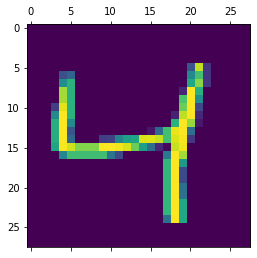

In [5]:
plt.matshow(X_train[2]) # to check what digit is there in X_train

In [6]:
y_train[2] # to see the output of X_train.

4

In [7]:
X_train = X_train / 255    # Scaling the train and test model.
X_test = X_test / 255

In [8]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [9]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 191us/sample - loss: 0.4889 - accuracy: 0.8765
Epoch 2/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3062 - accuracy: 0.9152
Epoch 3/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.2854 - accuracy: 0.9214
Epoch 4/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2747 - accuracy: 0.9245
Epoch 5/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2676 - accuracy: 0.9261


In [11]:
# Now testing the accuracy using test data set.

model.evaluate(X_test_flattened, y_test)


10000/10000 [==============================] - 2s 170us/sample - loss: 0.2662 - accuracy: 0.9255


[0.26616409905850885, 0.9255]

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.41203145e-05, 1.15065568e-10, 3.19985884e-05, 6.75202720e-03,
       1.10538178e-06, 6.18050035e-05, 1.08706355e-09, 7.24511087e-01,
       6.03220433e-05, 8.76521925e-04], dtype=float32)

In [13]:
np.argmax(y_predicted[0])

7

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    5,    9,    3,    3,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,   10,  912,   23,    9,    5,   13,   10,   41,    4],
       [   1,    0,   12,  937,    0,   17,    3,   13,   19,    8],
       [   1,    1,    2,    1,  917,    0,   10,    4,    8,   38],
       [   7,    3,    2,   39,   12,  767,   15,    9,   29,    9],
       [   7,    3,    7,    1,    8,   13,  915,    2,    2,    0],
       [   1,    6,   20,    7,    7,    0,    0,  950,    2,   35],
       [   3,    8,    6,   28,    9,   25,    9,   12,  867,    7],
       [   9,    7,    1,   10,   28,    5,    0,   22,    8,  919]])>

Text(69.0, 0.5, 'Truth')

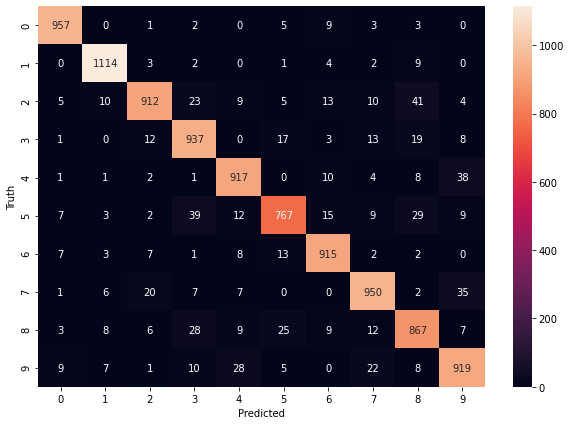

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
# Hidden Layer

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2952 - accuracy: 0.9185
Epoch 2/5
60000/60000 [==============================] - 13s 215us/sample - loss: 0.1377 - accuracy: 0.9598
Epoch 3/5
60000/60000 [==============================] - 13s 214us/sample - loss: 0.1006 - accuracy: 0.9706
Epoch 4/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0774 - accuracy: 0.9771
Epoch 5/5
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0642 - accuracy: 0.9800


Text(69.0, 0.5, 'Truth')

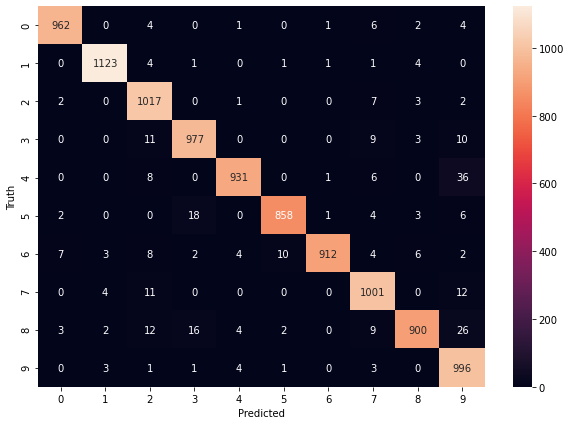

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
# Using flattened layer so we don't have to use reshape.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 549us/sample - loss: 0.2927 - accuracy: 0.9175
Epoch 2/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.1354 - accuracy: 0.9607
Epoch 3/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.0963 - accuracy: 0.9718
Epoch 4/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0753 - accuracy: 0.9772
Epoch 5/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0605 - accuracy: 0.9815
Epoch 6/10
60000/60000 [==============================] - 13s 225us/sample - loss: 0.0492 - accuracy: 0.9846
Epoch 7/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0404 - accuracy: 0.9874
Epoch 8/10
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0335 - accuracy: 0.9899
Epoch 9/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0281 - accuracy: 0.9